In [ ]:
#Importing all the libraries 

In [2]:
import os
import tempfile

from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import cv2

In [ ]:
#loading pretrained model

In [5]:
model = tf.keras.models.load_model('model_caseA')

In [ ]:
#testing the data

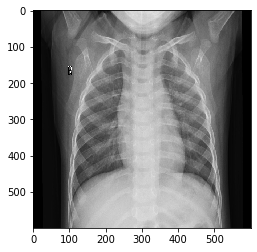

[[0.]]
NORMAL


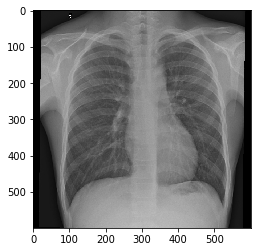

[[0.]]
NORMAL


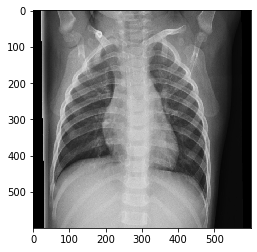

[[0.]]
NORMAL


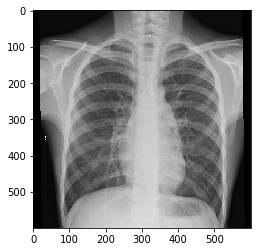

[[0.]]
NORMAL


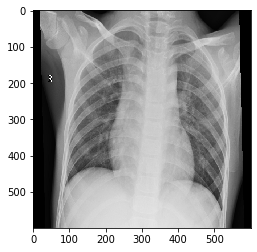

[[0.]]
NORMAL


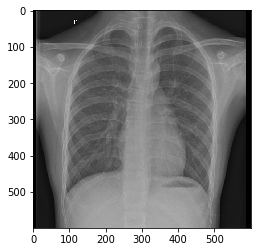

[[0.]]
NORMAL


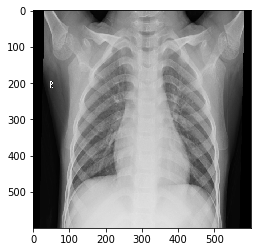

[[0.]]
NORMAL


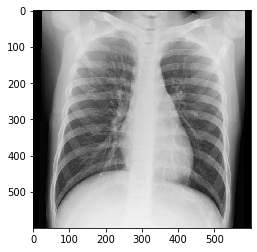

[[0.]]
NORMAL


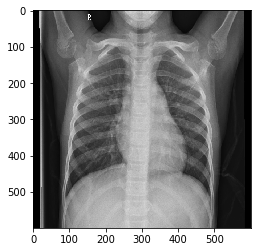

[[1.]]
PNEUMONIA


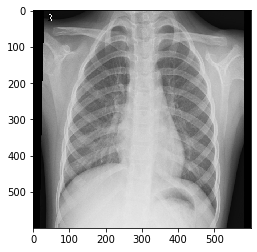

[[0.]]
NORMAL


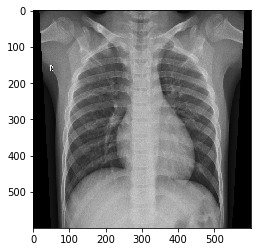

[[0.]]
NORMAL


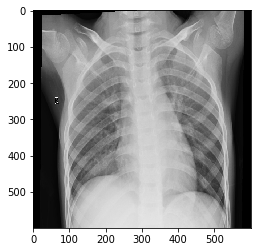

[[0.]]
NORMAL


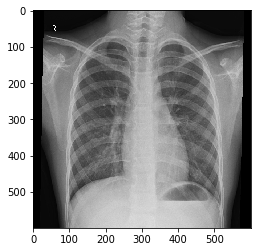

[[0.]]
NORMAL


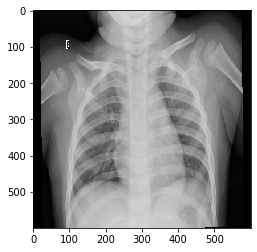

[[0.]]
NORMAL


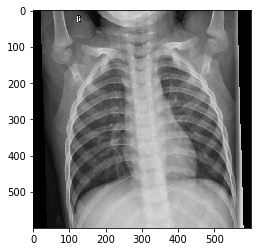

[[0.]]
NORMAL


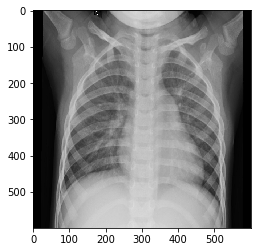

[[0.]]
NORMAL


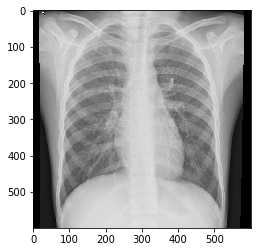

[[0.]]
NORMAL


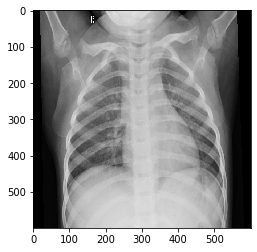

[[1.]]
PNEUMONIA


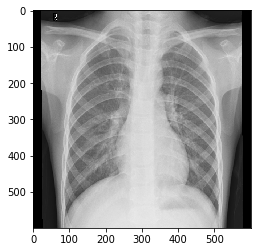

[[0.]]
NORMAL


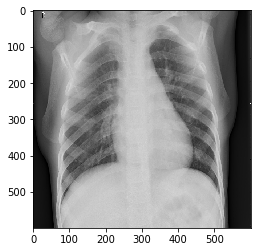

[[0.]]
NORMAL


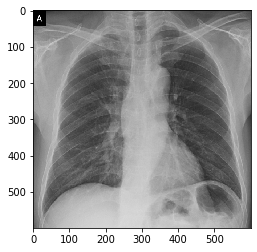

[[1.]]
PNEUMONIA


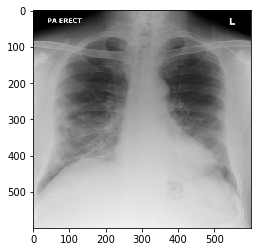

[[1.]]
PNEUMONIA


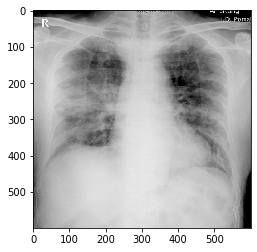

[[1.]]
PNEUMONIA


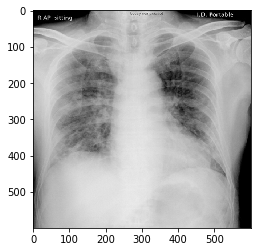

[[1.]]
PNEUMONIA


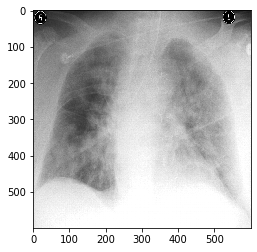

[[1.]]
PNEUMONIA


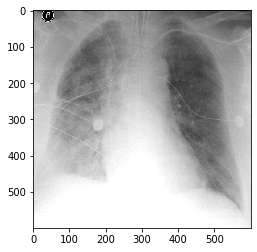

[[1.]]
PNEUMONIA


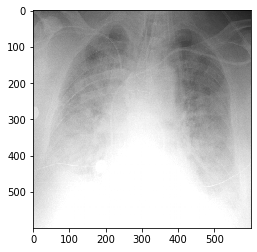

[[1.]]
PNEUMONIA


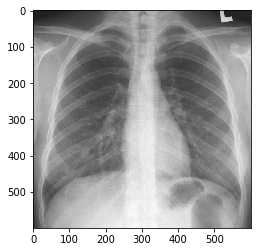

[[1.]]
PNEUMONIA


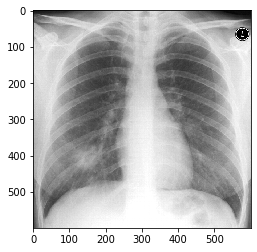

[[1.]]
PNEUMONIA


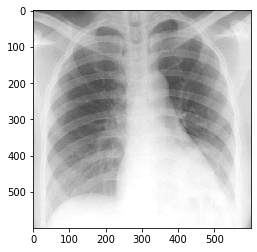

[[1.]]
PNEUMONIA


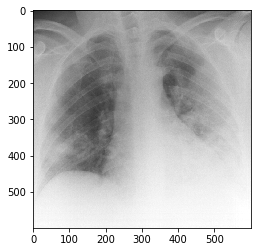

[[1.]]
PNEUMONIA


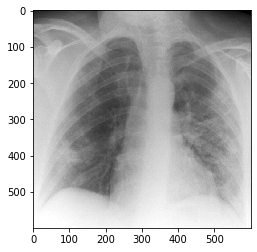

[[1.]]
PNEUMONIA


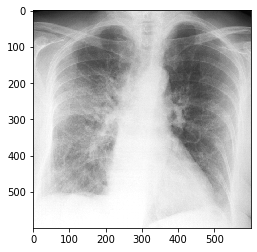

[[1.]]
PNEUMONIA


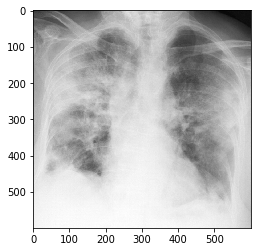

[[1.]]
PNEUMONIA


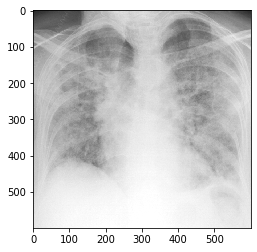

[[1.]]
PNEUMONIA


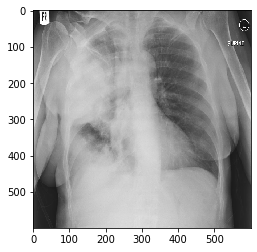

[[1.]]
PNEUMONIA


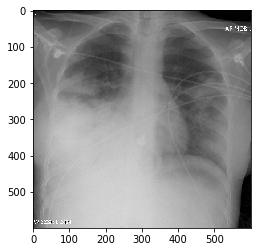

[[1.]]
PNEUMONIA


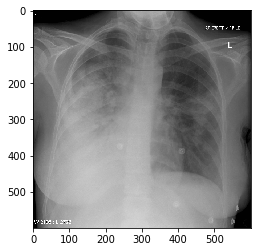

[[1.]]
PNEUMONIA


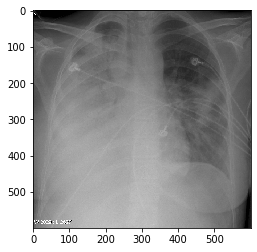

[[1.]]
PNEUMONIA


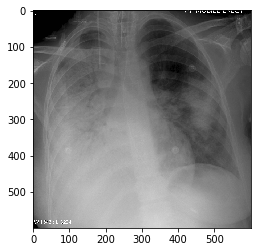

[[1.]]
PNEUMONIA


In [6]:
from tensorflow.keras.preprocessing import image
dir_path = 'test/TEST'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(600,600))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    print(val)
    if (val == 0):
        print("NORMAL")
    else:
        print("PNEUMONIA")

In [ ]:
#Confusion Matrix

In [7]:
def image_import (img_path, class_type, appended_list):
    for i in os.listdir(img_path):
        read_path = os.path.join(img_path, i)
       
        img = cv2.imread(read_path)
        img = cv2.resize(img, (600, 600))
        appended_list.append([img, class_type])

In [8]:
img_path = 'test/PNEUMONIA'
testing_data=[]
image_import(img_path, 1, testing_data)

In [9]:
#import normal lung images
img_path = 'test/NORMAL'
image_import(img_path, 0, testing_data)

In [10]:
import random
random.shuffle(testing_data)

In [11]:
test_features = []
test_targets = []

for f, t in testing_data:
    test_features.append(f)
    test_targets.append(t)

test_features = np.array(test_features).reshape(-1, 600, 600, 3)
test_targets = np.array(test_targets)   
test_features = test_features/255

In [12]:
false_negative = 0
false_positive = 0
true_negative = 0
true_positive = 0

result = model.predict_classes(test_features)
accuracy = model.evaluate(test_features,test_targets)[1]

for i in range(len(test_features)):
    if test_targets[i] == 1:
        if result[i] == 1:
            true_positive += 1
        elif result[i] == 0: 
            false_negative += 1
        else:
            print('class not found')
    if test_targets[i] == 0:
        if result[i] == 1:
            false_positive += 1
        elif result[i] == 0: 
            true_negative += 1
        else:
            print('error class not found')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
2/2 [==============================] - 1s 656ms/step - loss: 0.1090 - accuracy: 0.9500


In [13]:
#create confusion matrix data
import pandas as pd

test_result = [false_negative,
               true_negative,
              true_positive,
               false_positive]
adjusted_test_result = np.array(test_result)/(len(test_features))
df_test_result = pd.DataFrame(np.array(['false_negative','true_negative','true_positive','false_positive']),columns=['results'])
df_test_result['percent'] = adjusted_test_result
df_test_result

,results,percent
0,false_negative,0.00
1,true_negative,0.45
2,true_positive,0.50
3,false_positive,0.05


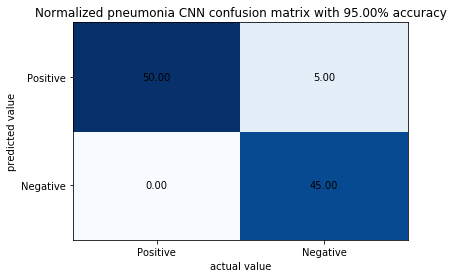

In [14]:
#confusion matrix plot 
fig,ax = plt.subplots()
heatmap = ax.pcolor((df_test_result['percent'].to_numpy().reshape(2,2)),cmap='Blues')
data = df_test_result['percent'].to_numpy().reshape(2,2)* 100
for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        ax.text(x + 0.5, y + 0.5, '%.2f' % data[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )
ax.set_xticks([0.5,1.5])
ax.set_yticks([0.5,1.5])
ax.set_xticklabels(['Positive','Negative'])
ax.set_yticklabels(['Negative','Positive'])
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.title('Normalized pneumonia CNN confusion matrix with %.2f' %(accuracy*100)+ '% accuracy')
plt.savefig('confusion_matrix.png')
plt.show()